# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [ ]:
def f_c_nieroz(x):
    return np.sign(x) * x + x**2

def f_roz_jedn(x):
    return np.sign(x)*x**2

def f_roz_trzykr(x):
    return (np.abs(np.sin(5*x)))**3

def a_1(x):
    return 1/(1+x**2)

def a_25(x):
    return 1/(1+25*x**2)

def a_100(x):
    return 1/(1+100*x**2)

def f_nieciagla(x):
    return np.sign(x)





***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

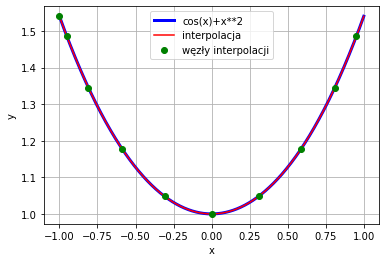

In [8]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 1e1
xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)